In [26]:
import numpy as np
import pandas as pd
import glob
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
#choosing the directory where the needed csv files are stored
path = r'F:/Hajara/Data_Science'
all_files = glob.glob(path + "/*.csv")

In [28]:
#for selecting only csv files from the path whose names are in the years list
years = ['2015','2016','2017','2018','2019','2020']

In [29]:
#creating dataframes for each .csv files in a dictionary having year as their names
df_dict={}
for filename in all_files:
    if Path(filename).stem in years:
        for name in years:
            if Path(filename).stem == name:
                df_dict[name] = pd.read_csv(filename)
        print(filename)

F:/Hajara/Data_Science\2015.csv
F:/Hajara/Data_Science\2016.csv
F:/Hajara/Data_Science\2017.csv
F:/Hajara/Data_Science\2018.csv
F:/Hajara/Data_Science\2019.csv
F:/Hajara/Data_Science\2020.csv


In [30]:

#having a dictionary for needed columns in the new dataframe as keys and already exist columns as values
needed_column_names= {"Country" : ["Country","Country or region","Country name"],
                       "Happiness Rank" : ["Happiness Rank","Happiness.Rank","Overall rank"],
                       "Happiness Score" : ["Happiness Score","Happiness.Score","Score","Ladder score"],
                       "GDP per Capita" : ["Economy (GDP per Capita)","Economy..GDP.per.Capita.","GDP per capita","Logged GDP per capita"],
                       "Social support" : ["Family","Social support"],
                       "Healthy Life Expectancy" : ["Health (Life Expectancy)","Health..Life.Expectancy.","Healthy life expectancy"],
                       "Freedom" : ["Freedom","Freedom to make life choices"],
                       "Generosity" : ["Generosity"],
                       "Perception of Corruption" : ["Trust (Government Corruption)","Trust..Government.Corruption.","Perceptions of corruption"]
                      }

In [31]:
#dropping unwanted columns in each dataframe
for name,df in df_dict.items():
    for col in df.columns:
        i=0
        for key, value in needed_column_names.items():         
            if col in value :
                break
            else:
                i = i+1
        if i == 9:
            df.drop(col, axis=1, inplace=True)            

In [32]:
#checking the dataframes whether unwanted columns dropped or not
for name, df in df_dict.items():
    print("name",name)
    print("df_columns",df.columns)

name 2015
df_columns Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')
name 2016
df_columns Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')
name 2017
df_columns Index(['Country', 'Happiness.Rank', 'Happiness.Score',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.'],
      dtype='object')
name 2018
df_columns Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
name 2019
df_columns Index(['Over

In [33]:
#renaming different names of a column to a common name in all dataframes
for name, df in df_dict.items():
    list_of_keys = []
    for col in df.columns:
        new_column_name = ''
        rename_factor=False
        keys = [key for key, value in needed_column_names.items() if col in value]
        list_of_keys.append(keys[0])
    df.columns = list_of_keys
#runs only one time. repeated runs give error message. No need to worry! 

In [34]:
#checking the dataframes whether column names are changed or not
for name, df in df_dict.items():
    print("name",name)
    print("df_columns",df.columns)

name 2015
df_columns Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita',
       'Social support', 'Healthy Life Expectancy', 'Freedom',
       'Perception of Corruption', 'Generosity'],
      dtype='object')
name 2016
df_columns Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita',
       'Social support', 'Healthy Life Expectancy', 'Freedom',
       'Perception of Corruption', 'Generosity'],
      dtype='object')
name 2017
df_columns Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita',
       'Social support', 'Healthy Life Expectancy', 'Freedom', 'Generosity',
       'Perception of Corruption'],
      dtype='object')
name 2018
df_columns Index(['Happiness Rank', 'Country', 'Happiness Score', 'GDP per Capita',
       'Social support', 'Healthy Life Expectancy', 'Freedom', 'Generosity',
       'Perception of Corruption'],
      dtype='object')
name 2019
df_columns Index(['Happiness Rank', 'Country', 'Happiness Score', 'GDP per

In [35]:
#insert column'year' in all dataframes
for name, df in df_dict.items():
    df.insert(loc = 0,column = 'Year', value = name)
#If it shows an error when running this cell,it is not an error. 
#It is showed ,because the above 'Year' column already inserted by the above code. Runs only first time.
#Second time shows error.But no problem. No need to do anything.

In [36]:
#checking the 'Year' column inserted in all dataframes
for name, df in df_dict.items():
    print("name",name)
    print("df_columns",df.columns)

name 2015
df_columns Index(['Year', 'Country', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social support', 'Healthy Life Expectancy',
       'Freedom', 'Perception of Corruption', 'Generosity'],
      dtype='object')
name 2016
df_columns Index(['Year', 'Country', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social support', 'Healthy Life Expectancy',
       'Freedom', 'Perception of Corruption', 'Generosity'],
      dtype='object')
name 2017
df_columns Index(['Year', 'Country', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social support', 'Healthy Life Expectancy',
       'Freedom', 'Generosity', 'Perception of Corruption'],
      dtype='object')
name 2018
df_columns Index(['Year', 'Happiness Rank', 'Country', 'Happiness Score',
       'GDP per Capita', 'Social support', 'Healthy Life Expectancy',
       'Freedom', 'Generosity', 'Perception of Corruption'],
      dtype='object')
name 2019
df_columns Index(['Year', 'Happiness Rank'

In [37]:
#concatenate all dataframes into one big dataframe
list_of_dataframes = []
for name, df in df_dict.items():
    list_of_dataframes.append(df)
    frame = pd.concat(list_of_dataframes, axis=0, ignore_index=True)


In [40]:
#checking the large dataframe
frame.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy Life Expectancy,Freedom,Perception of Corruption,Generosity
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [41]:
frame.columns

Index(['Year', 'Country', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social support', 'Healthy Life Expectancy',
       'Freedom', 'Perception of Corruption', 'Generosity'],
      dtype='object')

In [42]:
frame.sample()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy Life Expectancy,Freedom,Perception of Corruption,Generosity
664,2019,Trinidad & Tobago,39,6.192,1.231,1.477,0.713,0.489,0.016,0.185


In [43]:
#adding another column 'Regional indicator' to DF by merging another DF with countryname and regional indicator columns.
col_list = ["Country name", "Regional indicator"]
df_20 = pd. read_csv("F:/Hajara/Data_Science/2020.csv", usecols=col_list)
df_20.columns = ['Country', 'Region']
frame = frame.merge(df_20, how='inner', on='Country')
frame.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy Life Expectancy,Freedom,Perception of Corruption,Generosity,Region
0,2015,Switzerland,1,7.587,1.39651,1.349510,0.941430,0.665570,0.419780,0.296780,Western Europe
1,2016,Switzerland,2,7.509,1.52733,1.145240,0.863030,0.585570,0.412030,0.280830,Western Europe
2,2017,Switzerland,4,7.494,1.56498,1.516912,0.858131,0.620071,0.367007,0.290549,Western Europe
3,2018,Switzerland,5,7.487,1.42000,1.549000,0.927000,0.660000,0.357000,0.256000,Western Europe
4,2019,Switzerland,6,7.480,1.45200,1.526000,1.052000,0.572000,0.343000,0.263000,Western Europe


In [44]:
# Re-arranging column 'Regional indicator' in the position after 'Country name'
column = frame.pop('Region')
frame.insert(3, 'Region', column)
frame.head()

,Year,Country,Happiness Rank,Region,Happiness Score,GDP per Capita,Social support,Healthy Life Expectancy,Freedom,Perception of Corruption,Generosity
0,2015,Switzerland,1,Western Europe,7.587,1.39651,1.349510,0.941430,0.665570,0.419780,0.296780
1,2016,Switzerland,2,Western Europe,7.509,1.52733,1.145240,0.863030,0.585570,0.412030,0.280830
2,2017,Switzerland,4,Western Europe,7.494,1.56498,1.516912,0.858131,0.620071,0.367007,0.290549
3,2018,Switzerland,5,Western Europe,7.487,1.42000,1.549000,0.927000,0.660000,0.357000,0.256000
4,2019,Switzerland,6,Western Europe,7.480,1.45200,1.526000,1.052000,0.572000,0.343000,0.263000


In [21]:
#creating a csv file for the final arranged dataframe 'frame'
with open('F:/Hajara/Data_Science/happiness_report_15_20.csv', 'w', encoding='utf-8') as f:
    frame.to_csv(f, index=False)

In [22]:
#for a better Tableau Dashboard purpose, creating a excel file for the final arranged dataframe 'frame'
frame.to_excel('F:/Hajara/Data_Science/happiness_report.xlsx', sheet_name='new_sheet_name')

In [45]:
#information of column names and datatypes
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 883
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      884 non-null    object 
 1   Country                   884 non-null    object 
 2   Happiness Rank            884 non-null    int64  
 3   Region                    884 non-null    object 
 4   Happiness Score           884 non-null    float64
 5   GDP per Capita            884 non-null    float64
 6   Social support            884 non-null    float64
 7   Healthy Life Expectancy   884 non-null    float64
 8   Freedom                   884 non-null    float64
 9   Perception of Corruption  883 non-null    float64
 10  Generosity                884 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 82.9+ KB


In [46]:
#checking for null values
frame.isnull().values.any()

True

In [47]:
#showing the rows with null values
frame[frame.isnull().values==True]

,Year,Country,Happiness Rank,Region,Happiness Score,GDP per Capita,Social support,Healthy Life Expectancy,Freedom,Perception of Corruption,Generosity
117,2018,United Arab Emirates,20,Middle East and North Africa,6.774,2.096,0.776,0.67,0.284,NaN,0.186


In [49]:
#checking for null values columnwise
frame.isnull().sum()

Year                        0
Country                     0
Happiness Rank              0
Region                      0
Happiness Score             0
GDP per Capita              0
Social support              0
Healthy Life Expectancy     0
Freedom                     0
Perception of Corruption    1
Generosity                  0
dtype: int64

<AxesSubplot:xlabel='Freedom', ylabel='Country'>

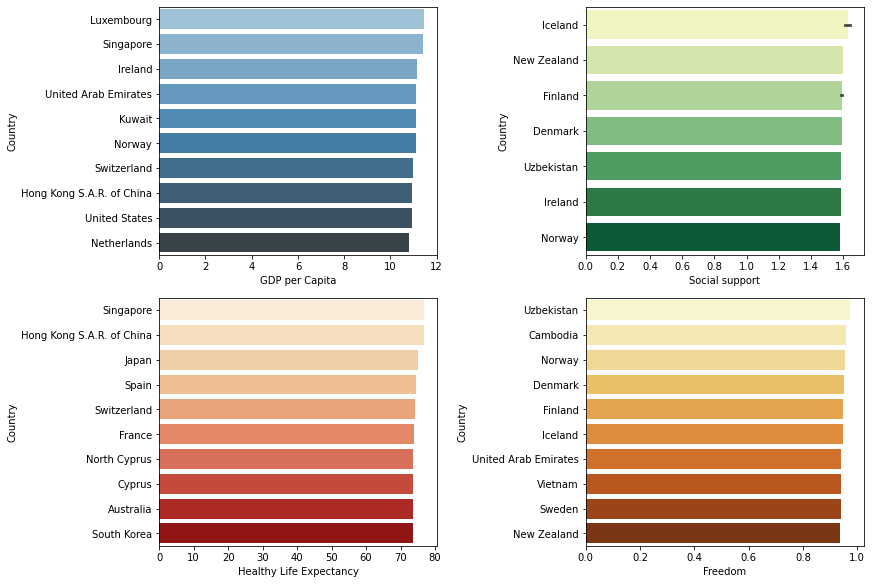

In [24]:
#plotting for top 10 countries for each attribute
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))
sns.barplot(x='GDP per Capita',y='Country',data=frame.nlargest(10,'GDP per Capita'),ax=axes[0,0],palette="Blues_d")
sns.barplot(x='Social support' ,y='Country',data=frame.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")
sns.barplot(x='Healthy Life Expectancy' ,y='Country',data=frame.nlargest(10,'Healthy Life Expectancy'),ax=axes[1,0],palette='OrRd')
sns.barplot(x='Freedom' ,y='Country',data=frame.nlargest(10,'Freedom'),ax=axes[1,1],palette='YlOrBr')

<AxesSubplot:xlabel='Perception of Corruption', ylabel='Country'>

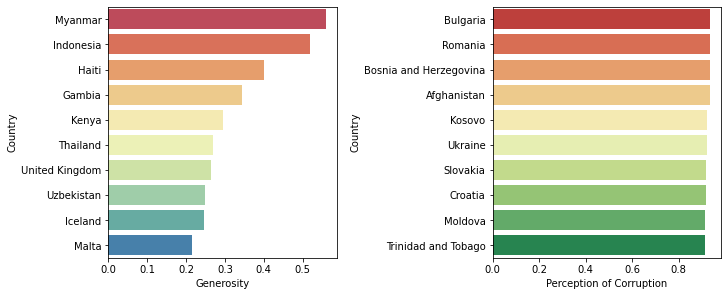

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country',data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Perception of Corruption' ,y='Country',data=df.nlargest(10,'Perception of Corruption'),ax=axes[1],palette='RdYlGn')

In [41]:
df_2020 = frame[frame.Year==2020]
d= df_2020.nlargest(3,['Happiness Rank'])